In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

2025-08-11 11:21:19.231700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754900479.253033    6187 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754900479.260193    6187 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754900479.277328    6187 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754900479.277346    6187 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754900479.277348    6187 computation_placer.cc:177] computation placer alr

In [ ]:
df = pd.read_excel("ENB2012_data.xlsx")

In [ ]:
print(df.head())
print('\n\n', df.tail())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


        X1     X2     X3     X4   X5  X6   X7  X8     Y1     Y2
763  0.64  784.0  343.0  220.5  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.5  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.5  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.5  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.5  3.5   5  0.4   5  16.64  16.03


In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


|Variable Name	|Role	|Type	|Description	|Missing Values
|--|--|--|--|--
|X1	|Feature	|Continuous	|Relative Compactness		|no
|X2	|Feature	|Continuous	|Surface Area		|no
|X3	|Feature	|Continuous	|Wall Area		            |no
|X4	|Feature	|Continuous	|Roof Area		|no
|X5	|Feature	|Continuous	|Overall Height		|no
|X6	|Feature	|Integer	|Orientation		|no
|X7	|Feature	|Continuous	|Glazing Area		|no
|X8	|Feature	|Integer	|Glazing Area Distribution		|no
|Y1	|Target	    |Continuous	|Heating Load		|no
|Y2	|Target	    |Continuous	|Cooling Load		|no

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
target = 'Y1'

x = df[features].copy()
y_cont = df[target].to_numpy() # 1D numpy array
print(x.shape, y_cont.shape, x.isna().sum().sum(), np.isnan(y_cont).sum())

(768, 8) (768,) 0 0


### Sürekli hedefi 3 sınıfa dönüştürme (binning)

Sürekli bir hedef değişkeni, sınıflandırma yapabilmek için ayrık 3 sınıfa dönüştürülür. Temel seçenekler:

- Eşit frekans (quantile tabanlı, pd.qcut): Her sınıfta yaklaşık eşit sayıda örnek olur. Dengesizliği azaltır.

- Eşit genişlik (pd.cut): Değer aralığını üç eşit dilime böler. Dağılım çok çarpıksa sınıf sayıları dengesiz olabilir.   

- Özel eşikler: İş bilgisine göre belirlediğin kesim noktaları.

In [ ]:
# İlk train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y_cont, test_size=0.2, random_state=42)

In [ ]:
thresholds = np.percentile(y_train, [33.3, 66.6])
t1, t2 = thresholds

print(f"Thresholds for binning: {t1}, {t2}")

Thresholds for binning: 14.52258, 28.56258


<i>np.percentile(y_train, [33.3, 66.6])</i>  kodu, y_train adlı veri setinin 33.3'üncü ve 66.6'ıncı persentillerini bulur.

- t1: Verilerin %33.3'ünün bu değerden daha düşük veya eşit olduğu nokta.

- t2: Verilerin %66.6'sının bu değerden daha düşük veya eşit olduğu nokta.

Böylece üç sınıfa ayrılmış olur:

x < t1: 1.sınıf, t1 < x < t2: 2.sınıf, t2 < x: 3. sınıf

In [ ]:
# Eğitim ve test verisini 3 sınıfa ayırma
y_class_train = np.digitize(y_train, bins=[t1, t2])
y_class_test = np.digitize(y_test, bins=[t1, t2])

# 0=low, 1=mid, 2=high üç kategori
print(np.unique(y_class_train, return_counts=True))
print(np.unique(y_class_test, return_counts=True))

(array([0, 1, 2]), array([205, 204, 205]))
(array([0, 1, 2]), array([49, 48, 57]))


np.digitize → Belirlenen eşiklere göre sayısal etiketler (0, 1, 2) üretir.

Test setini de train’den gelen eşiklerle bölüyoruz, böylece veri sızıntısı (data leakage) önlenmiş oluyor.

Birçok makine öğrenmesi modeli, özellikle de sinir ağları, girdi olarak sayısal değerleri bekler. Ancak sınıflar (örneğin: kedi, köpek, kuş) metinsel ifadelerdir. Bu metinleri doğrudan sayılara dönüştürmek (kedi=0, köpek=1, kuş=2 gibi) genellikle iyi bir fikir değildir, çünkü bu sayılar arasında modelin yanlış yorumlayabileceği bir sıralama ilişkisi yaratır. Yani, model köpek sınıfının kedi sınıfından daha "büyük" veya "üstün" olduğunu düşünebilir ki bu anlamsızdır.

One-hot encoding, bu sıralama sorununu çözerek her bir sınıfı eşit derecede önemli hale getirir. Her bir sınıf için yeni bir sütun (veya boyut) oluşturur ve o sınıfa ait örnekte ilgili sütuna 1, diğer tüm sütunlara ise 0 yazar.

In [ ]:
#standartlaştırma
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

# std==0 olan sütunlar için 1 ile değiştir (böylece bölme güvenli)
std_repl = std.replace(0, 1)

x_train_std = (x_train - mean) / std_repl
x_test_std = (x_test - mean) / std_repl

# Sonuç DataFrame'ler sütun isimlerini ve index'i korur
print(x_train_std.head())

           X1        X2        X3        X4        X5        X6        X7  \
60   0.553220 -0.695655 -0.007366 -0.678495  1.015593 -1.363299 -1.009476   
618 -1.154177  1.249645  0.557984  0.956283 -0.983042  0.440722  1.226790   
346  0.932641 -0.973555 -0.572717 -0.678495  1.015593  0.440722  0.108657   
294  1.312063 -1.251455 -0.007366 -1.223421  1.015593  0.440722  0.108657   
231 -0.964466  0.971745 -0.007366  0.956283 -0.983042  1.342732 -1.009476   

           X8  
60  -1.159653  
618 -0.515285  
346 -0.515285  
294 -1.159653  
231  0.773452  


Makine öğrenmesinde, verileri standartlaştırmak için kullanılan ortalama (mean) ve standart sapma (std) değerleri yalnızca <B>eğitim verisi (x_train)</B> üzerinden hesaplanmalıdır. Bunun nedeni, modelin eğitim sırasında görmediği verilerle ilgili hiçbir bilgiyi kullanmaması gerektiğidir.

In [ ]:
# Kaydet
np.savez("scaler_stats.npz", mean=mean.values, std=std.values, cols=x_train.columns.to_list())

# Yükle
data = np.load("scaler_stats.npz", allow_pickle=True)
mean_loaded_arr = data["mean"]
std_loaded_arr  = data["std"]
cols = data["cols"].tolist()

# Series'e geri çevir
mean_loaded = pd.Series(mean_loaded_arr, index=cols)
std_loaded  = pd.Series(std_loaded_arr,  index=cols)

# Uygula
std_loaded_repl = std_loaded.replace(0, 1)
X_test_scaled = (x_test - mean_loaded) / std_loaded_repl


- <b>Kaydetme (np.savez):</b> Eğitimi tamamladığınızda, X_train üzerinden hesaplanan mean ve std değerlerini bir .npz dosyasına kaydedersiniz. Bu dosya, modelle birlikte saklanır.

- <b>Yükleme (np.load):</b> Modelinizi test etmek veya canlı bir ortamda kullanmak istediğinizde, bu kaydedilmiş mean ve std değerlerini dosyadan geri yüklersiniz.

- <b> Uygulama (X_test_scaled = ...):</b> Yüklenen bu istatistikler, yeni gelen X_test verisine uygulanır. Bu, X_test verisinin, modelin eğitimde gördüğü dağılıma göre standartlaştırılmasını sağlar.

In [ ]:
#train_ratio, val_ratio, test_ratio: Veri setlerinin hangi oranlarda ayrılacağını belirten değerler.
def stratified_split(X, y_class, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_state=None):
    if random_state is not None: #random_state: İşlemin her seferinde aynı sonucu vermesini sağlayan bir başlangıç değeri.
        np.random.seed(random_state)

    # Tüm indeksler
    n_samples = len(y_class)
    indices = np.arange(n_samples)

    # Çıktı listeleri (boş)
    train_idx, val_idx, test_idx = [], [], []

    # Her sınıf için indeksleri al
    classes = np.unique(y_class) #unique ile y_class'ta kaç farklı sınıf olduğunu buluruz
    for c in classes: # Her sınıf için, o sınıfa ait veri örneklerinin indekslerini alırız
        class_idx = indices[y_class == c]  # Bu sınıfa ait indeksler
        perm = np.random.permutation(class_idx)  # veri setinde sıralı yapı varsa indexleri karıştır

        # train_ratio, val_ratio oranlarına göre,
        # bu karışık indeksleri üç parçaya böler: train, val ve test
        n_total = len(class_idx)
        n_train = int(n_total * train_ratio)
        n_val   = int(n_total * val_ratio)
        # test otomatik kalan
        n_test  = n_total - n_train - n_val

        train_idx.extend(perm[:n_train])
        val_idx.extend(perm[n_train:n_train+n_val])
        test_idx.extend(perm[n_train+n_val:])

    # son karıştırma (farklı sınıfların indeksleri birleşince sıralı olmasın)
    train_idx = np.random.permutation(train_idx)
    val_idx   = np.random.permutation(val_idx)
    test_idx  = np.random.permutation(test_idx)

    # Splitleri döndür
    return X[train_idx], X[val_idx], X[test_idx], y_class[train_idx], y_class[val_idx], y_class[test_idx]



In [ ]:
# Asıl veriyi kullanarak stratified split
X_train, X_val, X_test, y_train, y_val, y_test = stratified_split(
    x_train_std.values, y_class_train, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_state=42
)


# Dağılımı kontrol et
print("Train dağılımı:", np.bincount(y_train))
print("Val   dağılımı:", np.bincount(y_val))
print("Test  dağılımı:", np.bincount(y_test))

Train dağılımı: [143 142 143]
Val   dağılımı: [30 30 30]
Test  dağılımı: [32 32 32]


In [ ]:
num_classes = len(np.unique(y_train))

# One-hot encoding
y_train_oh = np.eye(num_classes)[y_train]
y_val_oh   = np.eye(num_classes)[y_val]
y_test_oh  = np.eye(num_classes)[y_test]

In [ ]:
# Fully connected neural network
def relu(x): #forward pass için ReLU aktivasyon fonksiyonu
    return np.maximum(0, x)


def relu_derivative(x): # backward pass için ReLU türevi
    # ReLU türevi, x > 0 ise 1, aksi halde 0
    return (x > 0).astype(float)


def softmax(x):
    # x: (sınıf_sayısı, örnek_sayısı)
    e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return e_x / np.sum(e_x, axis=0, keepdims=True)


def init_params(input_size, hidden_size, output_size):
    np.random.seed(42)
    w1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    w2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return w1, b1, w2, b2


def forward_pass(x, w1, b1, w2, b2):
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    return z1, a1, z2, a2


def backward_pass(x, y, z1, a1, z2, a2, w2):
    """
    x: (input_size, batch_size) girdi matrisi
    y: (num_classes, batch_size) one-hot hedef
    """
    m = x.shape[1]  # Batch size

    # BACKWARD
    # Son katman gradyanları
    dz2 = (a2 - y)                                       # (num_classes, batch_size)
    dw2 = np.dot(dz2, a1.T) / m                          # (num_classes, hidden_size)
    db2 = np.sum(dz2, axis=1, keepdims=True) / m         # (num_classes, 1)

    # İlk katman gradyanları
    da1 = np.dot(w2.T, dz2)                             # (hidden_size, batch_size)
    dz1 = da1 * relu_derivative(z1)                     # (hidden_size, batch_size)
    dw1 = np.dot(dz1, x.T) / m                          # (hidden_size, input_size)
    db1 = np.sum(dz1, axis=1, keepdims=True) / m        # (hidden_size, 1)

    return dw1, db1, dw2, db2




def sgd_optimizer(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate=0.01):
    """
    Stochastic Gradient Descent (SGD) optimizasyonu
    w1, b1, w2, b2: Ağırlık ve biaslar
    dw1, db1, dw2, db2: Gradyanlar
    learning_rate: Öğrenme oranı
    """
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2

    return w1, b1, w2, b2




def adam_optimizer(w1, b1, w2, b2, dw1, db1, dw2, db2,
                  m_w1, m_b1, m_w2, m_b2,
                  v_w1, v_b1, v_w2, v_b2,
                  t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Adam optimizasyonu
    w1, b1, w2, b2: Ağırlık ve biaslar
    dw1, db1, dw2, db2: Gradyanlar
    m_w1, m_b1, m_w2, m_b2: İlk moment tahminleri
    v_w1, v_b1, v_w2, v_b2: İkinci moment tahminleri
    t: Güncelleme adımı
    learning_rate: Öğrenme oranı
    beta1: İlk moment için beta değeri
    beta2: İkinci moment için beta değeri
    epsilon: Sıfıra bölme hatasını önlemek için küçük bir değer
    """
    # İlk moment güncellemesi
    m_w1 = beta1 * m_w1 + (1 - beta1) * dw1
    m_b1 = beta1 * m_b1 + (1 - beta1) * db1
    m_w2 = beta1 * m_w2 + (1 - beta1) * dw2
    m_b2 = beta1 * m_b2 + (1 - beta1) * db2

    # İkinci moment güncellemesi
    v_w1 = beta2 * v_w1 + (1 - beta2) * (dw1 ** 2)
    v_b1 = beta2 * v_b1 + (1 - beta2) * (db1 ** 2)
    v_w2 = beta2 * v_w2 + (1 - beta2) * (dw2 ** 2)
    v_b2 = beta2 * v_b2 + (1 - beta2) * (db2 ** 2)

    # Bias düzeltmeleri
    m_w1_hat = m_w1 / (1 - beta1 ** t)
    m_b1_hat = m_b1 / (1 - beta1 ** t)
    m_w2_hat = m_w2 / (1 - beta1 ** t)
    m_b2_hat = m_b2 / (1 - beta1 ** t)

    v_w1_hat = v_w1 / (1 - beta2 ** t)
    v_b1_hat = v_b1 / (1 - beta2 ** t)
    v_w2_hat = v_w2 / (1 - beta2 ** t)
    v_b2_hat = v_b2 / (1 - beta2 ** t)

    # Ağırlık ve bias güncellemeleri
    w1 -= learning_rate * m_w1_hat / (np.sqrt(v_w1_hat) + epsilon)
    b1 -= learning_rate * m_b1_hat / (np.sqrt(v_b1_hat) + epsilon)
    w2 -= learning_rate * m_w2_hat / (np.sqrt(v_w2_hat) + epsilon)
    b2 -= learning_rate * m_b2_hat / (np.sqrt(v_b2_hat) + epsilon)

    return w1, b1, w2, b2, m_w1, m_b1, m_w2, m_b2, v_w1, v_b1, v_w2, v_b2




In [ ]:
def train(X_train, y_train, epochs=50, lr=0.01, optimizer='sgd'):
    input_size = X_train.shape[1]
    hidden_size = 128
    output_size = y_train.shape[1]

    # Initial parameters
    w1, b1, w2, b2 = init_params(input_size, hidden_size, output_size)
    losses = []
    accuracies = []

    # Adam parameters
    if optimizer == 'adam':
        m_w1, m_b1 = np.zeros_like(w1), np.zeros_like(b1)
        m_w2, m_b2 = np.zeros_like(w2), np.zeros_like(b2)
        v_w1, v_b1 = np.zeros_like(w1), np.zeros_like(b1)
        v_w2, v_b2 = np.zeros_like(w2), np.zeros_like(b2)

    # Training loop
    for epoch in range(epochs):
        # forward pass
        z1, a1, z2, a2 = forward_pass(X_train.T, w1, b1, w2, b2)

        # Loss
        loss = - np.mean(np.sum(y_train.T * np.log(a2 + 1e-8), axis=0))  # Cross-entropy loss
        losses.append(loss)

        # backward pass
        dw1, db1, dw2, db2 = backward_pass(X_train.T, y_train.T, z1, a1, z2, a2, w2)

        # Update parameters
        if optimizer == 'sgd':
            w1, b1, w2, b2 = sgd_optimizer(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)
        elif optimizer == 'adam':
            w1, b1, w2, b2, m_w1, m_b1, m_w2, m_b2, v_w1, v_b1, v_w2, v_b2 = adam_optimizer(
                w1, b1, w2, b2, dw1, db1, dw2, db2,
                m_w1, m_b1, m_w2, m_b2, v_w1, v_b1, v_w2, v_b2,
                epoch + 1, lr
            )


        # Doğruluk hesapla (vektörlü)

        if epoch % 10 == 0:
            predictions = np.argmax(a2, axis=0)
            labels = np.argmax(y_train.T, axis=0)  # y_train.T kullanıldı
            acc = np.mean(predictions == labels)
            accuracies.append(acc)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

    return w1, b1, w2, b2, losses, accuracies


Epoch 1/300, Loss: 1.0984, Accuracy: 0.3995
Epoch 11/300, Loss: 1.0869, Accuracy: 0.6682
Epoch 21/300, Loss: 1.0518, Accuracy: 0.6682
Epoch 31/300, Loss: 0.9506, Accuracy: 0.6682
Epoch 41/300, Loss: 0.7963, Accuracy: 0.6682
Epoch 51/300, Loss: 0.6907, Accuracy: 0.6682
Epoch 61/300, Loss: 0.6259, Accuracy: 0.6682
Epoch 71/300, Loss: 0.5746, Accuracy: 0.7056
Epoch 81/300, Loss: 0.5306, Accuracy: 0.7290
Epoch 91/300, Loss: 0.4933, Accuracy: 0.7991
Epoch 101/300, Loss: 0.4626, Accuracy: 0.8107
Epoch 111/300, Loss: 0.4383, Accuracy: 0.8481
Epoch 121/300, Loss: 0.4192, Accuracy: 0.8505
Epoch 131/300, Loss: 0.4046, Accuracy: 0.8458
Epoch 141/300, Loss: 0.3935, Accuracy: 0.8411
Epoch 151/300, Loss: 0.3852, Accuracy: 0.8364
Epoch 161/300, Loss: 0.3790, Accuracy: 0.8364
Epoch 171/300, Loss: 0.3743, Accuracy: 0.8364
Epoch 181/300, Loss: 0.3708, Accuracy: 0.8364
Epoch 191/300, Loss: 0.3681, Accuracy: 0.8364
Epoch 201/300, Loss: 0.3660, Accuracy: 0.8364
Epoch 211/300, Loss: 0.3643, Accuracy: 0.8364

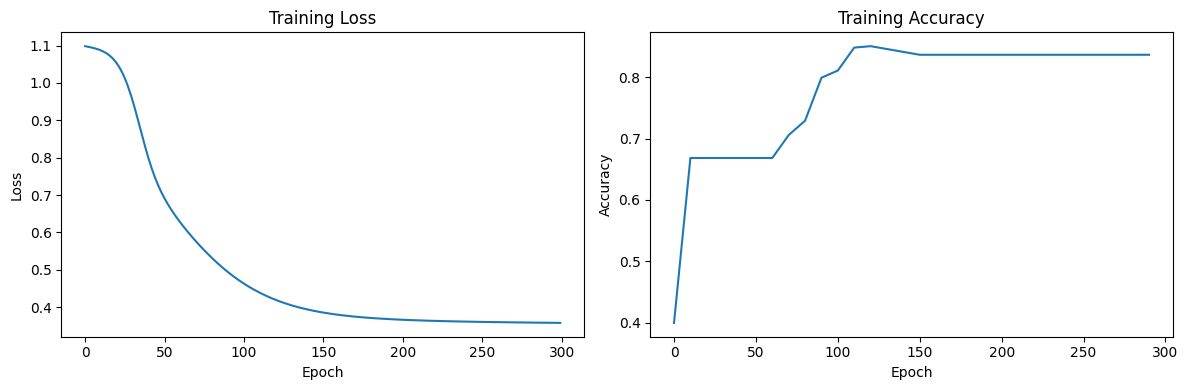

In [ ]:
# Eğitimi başlat (one-hot encoded y_train_oh kullanıldı)
w1, b1, w2, b2, losses, acc = train(X_train, y_train_oh, epochs=300, lr=0.15, optimizer='sgd')

# Sonuçları görselleştir
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(0, len(losses), 10), acc)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [ ]:
def test(X_test, y_test, w1, b1, w2, b2):
    """
    Eğitilmiş modeli test verisinde değerlendirir

    Parameters:
    X_test: Test verisi (numpy array)
    y_test: Test etiketleri (one-hot encoded)
    w1, b1, w2, b2: Eğitilmiş model parametreleri

    Returns:
    test_loss: Test loss değeri
    test_accuracy: Test doğruluğu
    predictions: Tahminler (sınıf indeksleri)
    probabilities: Olasılık dağılımları
    """

    # Forward pass
    z1, a1, z2, a2 = forward_pass(X_test.T, w1, b1, w2, b2)

    # Test loss hesapla
    test_loss = -np.mean(np.sum(y_test.T * np.log(a2 + 1e-8), axis=0))

    # Tahminleri al
    predictions = np.argmax(a2, axis=0)
    true_labels = np.argmax(y_test.T, axis=0)

    # Doğruluğu hesapla
    test_accuracy = np.mean(predictions == true_labels)

    # Olasılık dağılımları
    probabilities = a2.T  # (num_samples, num_classes) formatına çevir

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Accuracy (%): {test_accuracy * 100:.2f}%")

    return test_loss, test_accuracy, predictions, probabilities, true_labels


In [ ]:
# Test fonksiyonunu çalıştır
test_loss, test_acc, predictions, probabilities, true_labels = test(X_test, y_test_oh, w1, b1, w2, b2)


Test Loss: 0.2998
Test Accuracy: 0.8854
Test Accuracy (%): 88.54%


Text(158.22222222222223, 0.5, 'Actual')

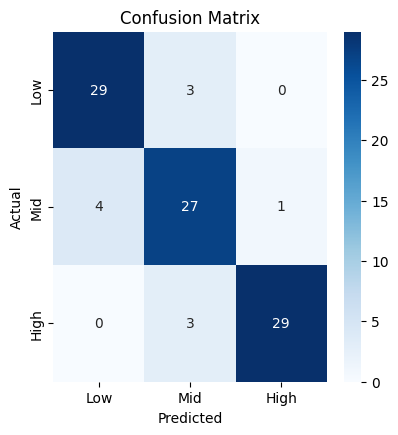

In [ ]:
# Test sonuçlarını görselleştirme
plt.figure(figsize=(15, 10))

# 1. Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.subplot(2, 3, 1)
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Mid', 'High'],
            yticklabels=['Low', 'Mid', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

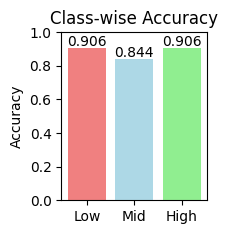

In [ ]:
# 2. Sınıf bazında doğruluk
plt.subplot(2, 3, 2)
class_accuracies = []
class_names = ['Low', 'Mid', 'High']
for i in range(3):
    mask = true_labels == i
    if np.sum(mask) > 0:
        class_acc = np.mean(predictions[mask] == true_labels[mask])
        class_accuracies.append(class_acc)
    else:
        class_accuracies.append(0)

plt.bar(class_names, class_accuracies, color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Class-wise Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(class_accuracies):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center')

Text(0, 0.5, 'Frequency')

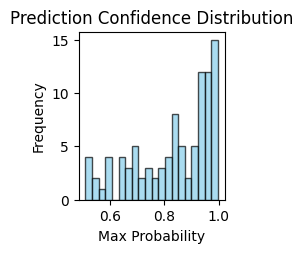

In [ ]:
# 3. Tahmin güven dağılımı
plt.subplot(2, 3, 3)
max_probs = np.max(probabilities, axis=1)
plt.hist(max_probs, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Prediction Confidence Distribution')
plt.xlabel('Max Probability')
plt.ylabel('Frequency')

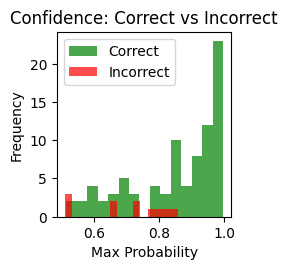

In [ ]:
# 4. Doğru ve yanlış tahminlerin güven karşılaştırması
plt.subplot(2, 3, 4)
correct_mask = predictions == true_labels
correct_probs = max_probs[correct_mask]
incorrect_probs = max_probs[~correct_mask]

plt.hist(correct_probs, bins=15, alpha=0.7, label='Correct', color='green')
plt.hist(incorrect_probs, bins=15, alpha=0.7, label='Incorrect', color='red')
plt.title('Confidence: Correct vs Incorrect')
plt.xlabel('Max Probability')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

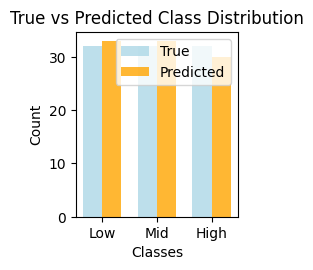

In [ ]:
# 5. Sınıf dağılımı karşılaştırması
plt.subplot(2, 3, 5)
true_counts = np.bincount(true_labels)
pred_counts = np.bincount(predictions)

x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, true_counts, width, label='True', alpha=0.8, color='lightblue')
plt.bar(x + width/2, pred_counts, width, label='Predicted', alpha=0.8, color='orange')

plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('True vs Predicted Class Distribution')
plt.xticks(x, class_names)
plt.legend()
plt.tight_layout()
plt.show()

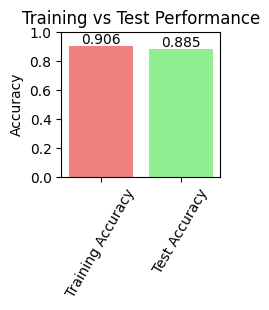

In [ ]:
# 6. Training vs Test performans karşılaştırması
plt.subplot(2, 3, 6)

final_train_acc = acc  # acc zaten tek değer ise
metrics = ['Training Accuracy', 'Test Accuracy']
values = [final_train_acc, test_acc]
colors = ['lightcoral', 'lightgreen']

bars = plt.bar(metrics, values, color=colors)
plt.title('Training vs Test Performance')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# X-tick etiketlerini 60 derece döndür
plt.xticks(rotation=60)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.01,
             f'{value:.3f}', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
# Detaylı sınıflandırma raporu
print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT")
print("="*50)

from sklearn.metrics import classification_report
print("\nScikit-learn Classification Report:")
print(classification_report(true_labels, predictions,
                          target_names=['Low', 'Mid', 'High']))

print(f"\nOverall Statistics:")
print(f"Total Test Samples: {len(true_labels)}")
print(f"Correct Predictions: {np.sum(predictions == true_labels)}")
print(f"Incorrect Predictions: {np.sum(predictions != true_labels)}")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

print(f"\nPer-class Statistics:")
for i, class_name in enumerate(class_names):
    mask = true_labels == i
    total = np.sum(mask)
    correct = np.sum((predictions == true_labels) & mask)
    print(f"{class_name}: {correct}/{total} correct ({correct/total*100:.1f}%)")


DETAILED CLASSIFICATION REPORT

Scikit-learn Classification Report:
              precision    recall  f1-score   support

         Low       0.88      0.91      0.89        32
         Mid       0.82      0.84      0.83        32
        High       0.97      0.91      0.94        32

    accuracy                           0.89        96
   macro avg       0.89      0.89      0.89        96
weighted avg       0.89      0.89      0.89        96


Overall Statistics:
Total Test Samples: 96
Correct Predictions: 85
Incorrect Predictions: 11
Test Accuracy: 0.8854 (88.54%)

Per-class Statistics:
Low: 29/32 correct (90.6%)
Mid: 27/32 correct (84.4%)
High: 29/32 correct (90.6%)
